In [1]:
''' FILE ACCESS '''

import json
import os
import glob
import smart_open

''' DATA QUERYING '''

import regex as re
import pandas as pd
import datetime
from datetime import datetime
from dateutil.parser import parse

''' THEMATIC ANALYSIS '''
from bertopic import BERTopic
#from transformers import AutoModel


''' TEXT PREPROCESSING '''
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
import regex as re

''' DATA VISUALIZATION '''

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sb

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
jan_sixth = pd.read_csv("Climate Posts January 6th.csv")
## Bluesky Posts
jan_ninth = pd.read_csv("Climate Posts January 9th.csv")
jan_twenty = pd.read_csv("Climate Posts January 20th.csv")

In [3]:
## Dropping the unneeded index files
jan_sixth.drop(columns=['Unnamed: 0'],inplace=True)
jan_twenty.drop(columns='Unnamed: 0',inplace=True)
jan_ninth.drop(columns='Unnamed: 0',inplace=True)

In [4]:
'''Creating a macro date collection label
'''
## January 6th
six_list = []
for row in range(0,len(jan_sixth)):
    six_list.append("January 6th")
    
jan_sixth['date'] = six_list



## January 20th
twenty_list = []
for row in range(0,len(jan_twenty)):
    twenty_list.append("January 20th")
    
jan_twenty['date'] = twenty_list



## January 9th
nine_list = []
for row in range(0,len(jan_ninth)):
    nine_list.append("January 9th")
    
jan_ninth['date'] = nine_list

### 2.1 Time Normalization

In [7]:
''' CONVERTING CREATED AT TIME TO TIMESTAMP'''
def time_converter(timestamp):
    dt = parse(timestamp)
    formatted_date_time = dt.strftime('%Y-%m-%d %H:%M')
    return (formatted_date_time)

In [8]:
## Applying the time_converter to the created_at time stamps
jan_sixth['datetime'] = jan_sixth['created_at'].apply(lambda x: time_converter(x))
jan_twenty['datetime'] = jan_twenty['created_at'].apply(lambda x: time_converter(x))
jan_ninth['datetime'] = jan_ninth['created_at'].apply(lambda x: time_converter(x))

## Turning the string stampes into datetime stampes
jan_sixth['datetime'] = pd.to_datetime(jan_sixth['datetime'])
jan_twenty['datetime'] = pd.to_datetime(jan_twenty['datetime'])
jan_ninth['datetime'] = pd.to_datetime(jan_ninth['datetime'])

### 2.2 Removing Numbers + Punctuation

In [9]:
def number_remover(text):
    new_text = re.sub("\d","",text)
    clean_text = re.sub("[.,?!#$%]","",new_text)
    return (clean_text)

In [11]:
jan_sixth['clean text'] = jan_sixth['text'].apply(lambda x: number_remover(x))
jan_twenty['clean text'] = jan_twenty['text'].apply(lambda x: number_remover(x))
jan_ninth['clean text'] = jan_ninth['text'].apply(lambda x: number_remover(x))

### 2.3 Creating a corpus for January 6th and January 20th

In [12]:
docs_jan6 = jan_sixth['clean text'].to_list()
docs_jan20 = jan_twenty['clean text'].to_list()

In [13]:
docs_jan9 = jan_ninth['clean text'].to_list()

In [14]:
''' we already know one of the values '''

' we already know one of the values '

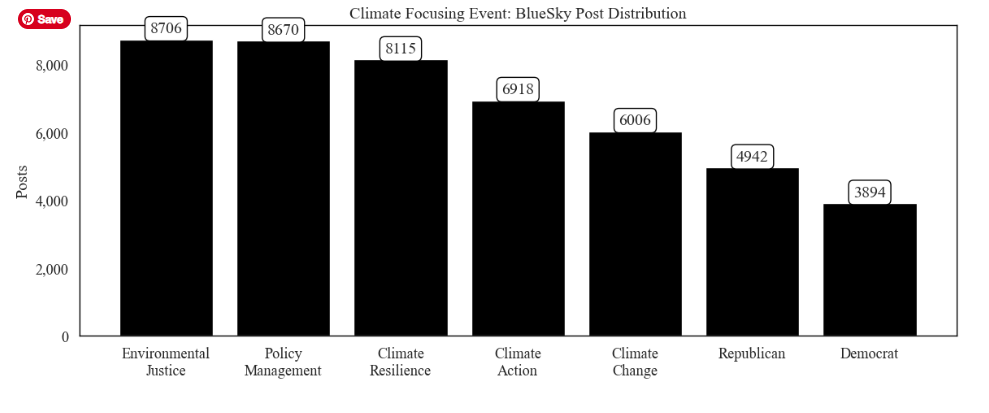

for climate policy on january 9th it is 8670 mentions

In [14]:
## importing the topic model from bluesky
topic_model = BERTopic.load("nataliecastro/bsky-posts-political")

topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,7,-1_disgracetotheusa_wwwncronlineorgearthbeatpo...,"[disgracetotheusa, wwwncronlineorgearthbeatpo,...",NaN
1,0,956,0_energy_renewable_fossil_renewables,"[energy, renewable, fossil, renewables, fuels,...",NaN
2,1,678,1_resilience_strength_your_and,"[resilience, strength, your, and, hope, commun...",NaN
3,2,481,2_tibet_earthquake_nepal_least,"[tibet, earthquake, nepal, least, china, near,...",NaN
4,3,360,3_mersea_actus_news_guardianeco,"[mersea, actus, news, guardianeco, ocean, cop,...",NaN
...,...,...,...,...,...
213,212,30,212_bluesky_threads_fb_posts,"[bluesky, threads, fb, posts, organizing, minu...",NaN
214,213,27,213_scorched_hes_grahams_syrias,"[scorched, hes, grahams, syrias, diss, going, ...",NaN
215,214,61,214_person_earth_worst_on,"[person, earth, worst, on, ugliest, dumbest, m...",NaN
216,215,19,215_scam_scientist_donor_dew,"[scam, scientist, donor, dew, experts, nobody,...",NaN


In [15]:
''' getting document info for each of the set of documents'''
six_list = []
for i in range(0,len(jan_sixth)):
    six_list.append("January 6th")
    
twenty_list = []
for i in range(0,len(jan_twenty)):
    twenty_list.append("January 20th")
    
jan_sixth['Focusing Event'] = six_list
jan_twenty['Focusing Event'] = twenty_list
corpus  = pd.concat([jan_sixth,jan_twenty])
docs = corpus['clean text'].to_list()

In [16]:
corpus_sorted = corpus.copy().sort_values(by='clean text')

In [17]:
doc_dates = corpus_sorted['Focusing Event'].to_list()

In [18]:
docinfo = topic_model.get_document_info(docs)

In [19]:
docinfo_sorted = docinfo.copy().sort_values(by='Document')

In [20]:
docinfo_sorted['Focusing Event'] = doc_dates

In [24]:
topic_counts = docinfo_sorted[['Name','Topic','Focusing Event']].value_counts()

In [25]:
topic_counts

Name                                    Topic  Focusing Event
0_energy_renewable_fossil_renewables    0      January 20th      654
7_paris_agreement_trump_withdraw        7      January 20th      493
1_resilience_strength_your_and          1      January 20th      456
2_tibet_earthquake_nepal_least          2      January 6th       453
5_he_trump_his_climate                  5      January 20th      385
                                                                ... 
184_village_guam_agat_wnw               184    January 6th         1
143_mersea_actus_zehub_les              143    January 6th         1
211_cosplay_nazi_hated_swine            211    January 6th         1
32_paris_agreement_withdrawal_accords   32     January 6th         1
178_birthright_citizenship_duck_gender  178    January 6th         1
Length: 432, dtype: int64

In [26]:
topic_counts_df = pd.DataFrame(topic_counts).reset_index()

In [27]:
topic_counts_df.rename(columns={0:"Frequency"},inplace=True)

In [28]:
topic_counts_df['Frequency'].sum()

19375

In [84]:
climate_action_topics = [21, 204, 4, 67, 13, 104, 15, 69, 47]

In [65]:
def dictionary_filter(topic_dictionary,df):
    frequencies = []
    for topic in topic_dictionary:
        topic_condition = df['Topic'] == topic
        
        current_frequency = df[topic_condition]
        
        frequency = len(current_frequency)
        print (topic, frequency)

        current_frequency = {"topic":topic,"frequency":frequency}
        
        frequencies.append(current_frequency)
        
    return (pd.DataFrame(frequencies))

In [23]:
groups = docinfo_sorted.groupby('Focusing Event')

In [32]:
jan6_docfreq = groups.get_group('January 6th')
jan20_docfreq = groups.get_group("January 20th")

In [34]:
jan6_climate_freq = dictionary_filter(climate_action_topics,jan6_docfreq)

21 53
204 3
4 113
67 32
13 106
104 13
15 87
69 50
47 48


In [35]:
jan6_climate_freq['frequency'].sum()

505

In [36]:
jan20_climate_freq = dictionary_filter(climate_action_topics,jan20_docfreq)

21 123
204 25
4 211
67 114
13 187
104 41
15 176
69 133
47 79


In [37]:
jan20_climate_freq['frequency'].sum()

1089

In [38]:
''' pulling the data for january 9th'''

' pulling the data for january 9th'

In [61]:
topic_model = BERTopic.load("nataliecastro/bsky-posts-climate")

In [62]:
docinfo = topic_model.get_document_info(docs_jan9)

In [63]:
climate_action_topics = [256, 13, 174, 45, 7,147, 171, 32,177]


In [66]:
jan9_climate_freq = dictionary_filter(climate_action_topics,docinfo)

256 45
13 236
174 73
45 153
7 283
147 103
171 35
32 219
177 27


In [43]:
jan9_climate_freq.sum()

topic        1022
frequency    1174
dtype: int64

In [45]:
''' and now we visualize!'''

data = pd.DataFrame()

data['Focusing Event'] = ['Historic Date of\nU.S. Capitol Protest','Los Angeles\nWild Fires','President Donald Trump\'s\nSecond Inaguration']
data['Policy Frequency'] = [505,1174,1089]

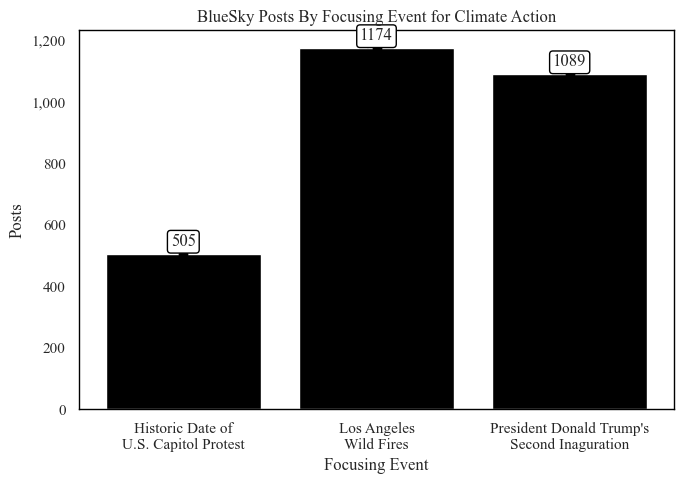

In [46]:
sb.set_style("white")
sb.set(font='Times New Roman', font_scale=1)
fig, ax = plt.subplots(figsize=(7,5 )) 



hist = sb.barplot(data,x="Focusing Event",y="Policy Frequency",color="black")


for bar_group in hist.containers:  # `containers` contains the histogram bars grouped by hue
    # Get heights and centers for each group
    heights = [bar.get_height() for bar in bar_group]
    centers = [bar.get_x() + bar.get_width() / 2 for bar in bar_group]
    
    # Add markers
    plt.scatter(centers, heights, color='black', zorder=3)
    
    for center, height in zip(centers, heights):
        plt.text(
            center, 
            height, 
            f'{int(height):,}',  # Format with commas
            color='black', 
            ha='center', 
            va='bottom', 
            fontsize=10
        )

for container in hist.containers:
    hist.bar_label(container, fmt='%d', label_type='edge', padding=3, bbox=dict(boxstyle="round,pad=0.2", edgecolor="black", facecolor="white"))

hist.set_title("BlueSky Posts By Focusing Event for Climate Action")
hist.set_xlabel("Focusing Event")
hist.set_ylabel("Posts")
ax.tick_params(axis='x')
ax.grid(True)
ax.set_facecolor("white")

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)


# Set the border (box) around the entire plot
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set the color of the border to black
    spine.set_linewidth(1)  # Set the width of the border

plt.tight_layout()
plt.savefig("Distribution of BlueSky Posts By Focusing Event for Climate Action.png",dpi=2500)
plt.show();

In [ ]:
''' re-runnning for theme bar plot '''

In [24]:
jan6_docfreq = groups.get_group('January 6th')
jan20_docfreq = groups.get_group("January 20th")

In [27]:
''' PARSING THROUGH THE DATAFRAME TO MAKE A LIST OF ALL OF THE DOCUMENTS THAT ARE IN POLICY MANAGEMENT '''

action_documents =jan6_docfreq[jan6_docfreq['Topic'].isin(climate_action_topics)]
action_documents.reset_index(inplace=True)
action_documents.drop(columns='index',inplace=True)

In [28]:
topn_words = action_documents['Document'].to_list()

In [29]:
joined_list = ' '.join(topn_words)
action_words = joined_list.split(" ")

In [31]:
## Removing stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

stop_words.update(["the","like","it"])

## Stemming the words so morphemes are counted together
from nltk.stem import PorterStemmer
ps = PorterStemmer()

stemmed_words = []
for word in action_words:
    if word not in stop_words:
        if word != "":
            if word != "&":
                if word != "-":
                    stem = ps.stem(word)

                    stemmed_words.append(stem)

In [32]:
from collections import Counter

c = Counter(stemmed_words)

In [33]:
action_wcs = pd.DataFrame(c.items(), columns=['Word', 'Count'])

In [40]:
action_wcs.sort_values(by='Count',ascending=False,inplace=True)
action_data = action_wcs.head(32)

In [41]:
action_data.reset_index(inplace=True)

In [42]:
action_data.drop(index=[7,13],inplace=True)

In [43]:
action_data

,index,Word,Count
0,49,i,146
1,212,climat,132
2,132,carbon,117
3,254,emiss,97
4,70,sustain,86
5,58,warm,84
6,57,global,70
8,100,chang,46
9,10,year,36
10,633,get,35


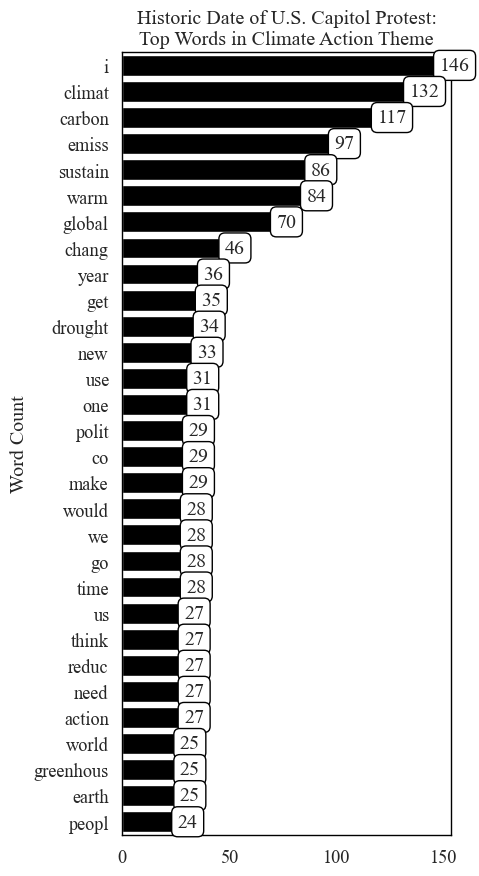

In [44]:
sb.set_style("white")
sb.set(font='Times New Roman', font_scale=1.2)
fig, ax = plt.subplots(figsize=(5,9 )) 



hist = sb.barplot(action_data,x="Count",y="Word",color="black")


'''for bar_group in hist.containers:  # `containers` contains the histogram bars grouped by hue
    # Get heights and centers for each group
    heights = [bar.get_height() for bar in bar_group]
    centers = [bar.get_x() + bar.get_width() / 2 for bar in bar_group]
    
    # Add markers
    plt.scatter(centers, heights, color='black', zorder=3)
    
    for center, height in zip(centers, heights):
        plt.text(
            center, 
            height, 
            f'{int(height):,}',  # Format with commas
            color='black', 
            ha='center', 
            va='bottom', 
            fontsize=10
        )

for container in hist.containers:
    hist.bar_label(container, fmt='%d', label_type='edge', padding=3, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
'''

for container in hist.containers:
    hist.bar_label(container, fmt='%d', label_type='edge', padding=3, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
hist.set_title("Historic Date of U.S. Capitol Protest:\nTop Words in Climate Action Theme")
hist.set_xlabel("")
hist.set_ylabel("Word Count")
ax.tick_params(axis='x')
ax.grid(True)
ax.set_facecolor("white")

'''formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)'''


# Set the border (box) around the entire plot
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set the color of the border to black
    spine.set_linewidth(1)  # Set the width of the border

plt.tight_layout()
plt.savefig("Capitol Protest- Top Words in Climate Action Theme.png",dpi=2500)
plt.show();

In [ ]:
''' january 20th '''

In [85]:
''' PARSING THROUGH THE DATAFRAME TO MAKE A LIST OF ALL OF THE DOCUMENTS THAT ARE IN POLICY MANAGEMENT '''

action_documents =jan20_docfreq[jan20_docfreq['Topic'].isin(climate_action_topics)]
action_documents.reset_index(inplace=True)
action_documents.drop(columns='index',inplace=True)

In [86]:
topn_words = action_documents['Document'].to_list()

In [87]:
joined_list = ' '.join(topn_words)
action_words = joined_list.split(" ")

In [88]:
## Removing stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

stop_words.update(["the","like","it"])

## Stemming the words so morphemes are counted together
from nltk.stem import PorterStemmer
ps = PorterStemmer()

stemmed_words = []
for word in action_words:
    if word not in stop_words:
        if word != "":
            if word != "&":
                if word != "-":
                    stem = ps.stem(word)

                    stemmed_words.append(stem)

In [89]:
from collections import Counter

c = Counter(stemmed_words)

In [90]:
action_wcs = pd.DataFrame(c.items(), columns=['Word', 'Count'])

In [91]:
action_wcs.sort_values(by='Count',ascending=False,inplace=True)
action_data = action_wcs.head(33)

In [92]:
action_data.reset_index(inplace=True)

In [93]:
action_data.drop(index=[7,25,29],inplace=True)

In [94]:
action_data

,index,Word,Count
0,28,climat,372
1,599,i,256
2,44,carbon,228
3,157,global,200
4,4,emiss,182
5,19,sustain,163
6,1,warm,138
8,341,polit,107
9,50,chang,105
10,513,us,91


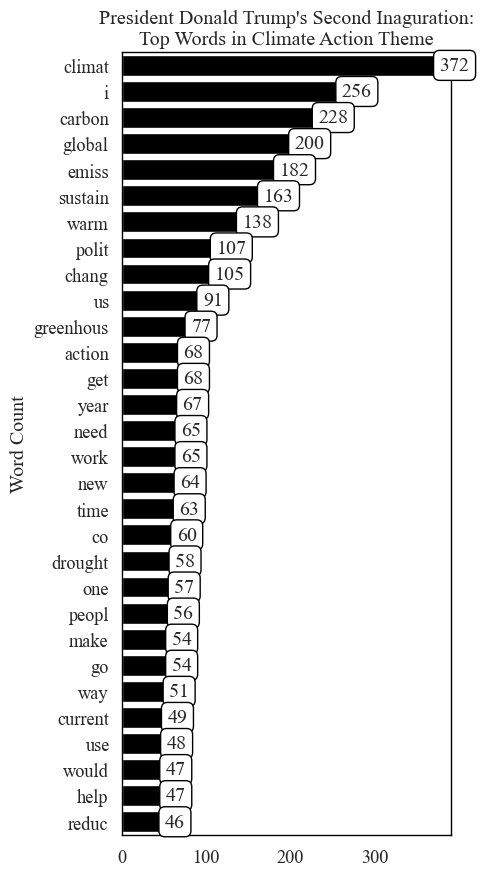

In [95]:
sb.set_style("white")
sb.set(font='Times New Roman', font_scale=1.2)
fig, ax = plt.subplots(figsize=(5,9 )) 



hist = sb.barplot(action_data,x="Count",y="Word",color="black")


'''for bar_group in hist.containers:  # `containers` contains the histogram bars grouped by hue
    # Get heights and centers for each group
    heights = [bar.get_height() for bar in bar_group]
    centers = [bar.get_x() + bar.get_width() / 2 for bar in bar_group]
    
    # Add markers
    plt.scatter(centers, heights, color='black', zorder=3)
    
    for center, height in zip(centers, heights):
        plt.text(
            center, 
            height, 
            f'{int(height):,}',  # Format with commas
            color='black', 
            ha='center', 
            va='bottom', 
            fontsize=10
        )

for container in hist.containers:
    hist.bar_label(container, fmt='%d', label_type='edge', padding=3, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
'''

for container in hist.containers:
    hist.bar_label(container, fmt='%d', label_type='edge', padding=3, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
hist.set_title("President Donald Trump's Second Inaguration:\nTop Words in Climate Action Theme")
hist.set_xlabel("")
hist.set_ylabel("Word Count")
ax.tick_params(axis='x')
ax.grid(True)
ax.set_facecolor("white")

'''formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)'''


# Set the border (box) around the entire plot
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set the color of the border to black
    spine.set_linewidth(1)  # Set the width of the border

plt.tight_layout()
plt.savefig("Inaguration- Top Words in Climate Action Theme.png",dpi=2500)
plt.show();

In [ ]:
''' january 9th'''

In [68]:
''' PARSING THROUGH THE DATAFRAME TO MAKE A LIST OF ALL OF THE DOCUMENTS THAT ARE IN POLICY MANAGEMENT '''

action_documents =docinfo_sorted[docinfo_sorted['Topic'].isin(climate_action_topics)]
action_documents.reset_index(inplace=True)
action_documents.drop(columns='index',inplace=True)

In [69]:
topn_words = action_documents['Document'].to_list()

In [70]:
joined_list = ' '.join(topn_words)
action_words = joined_list.split(" ")

In [71]:
## Removing stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

stop_words.update(["the","like","it"])

## Stemming the words so morphemes are counted together
from nltk.stem import PorterStemmer
ps = PorterStemmer()

stemmed_words = []
for word in action_words:
    if word not in stop_words:
        if word != "":
            if word != "&":
                if word != "-":
                    stem = ps.stem(word)

                    stemmed_words.append(stem)

In [72]:
from collections import Counter

c = Counter(stemmed_words)

In [73]:
action_wcs = pd.DataFrame(c.items(), columns=['Word', 'Count'])

In [78]:
action_wcs.sort_values(by='Count',ascending=False,inplace=True)
action_data = action_wcs.head(31)

In [79]:
action_data.reset_index(inplace=True)

In [80]:
action_data.drop(index=[10],inplace=True)

In [81]:
action_data

,index,Word,Count
0,15,climat,861
1,1,pari,579
2,74,us,392
3,64,trump,391
4,11,agreement,388
5,14,withdraw,313
6,439,i,218
7,87,emiss,211
8,82,carbon,195
9,85,chang,168


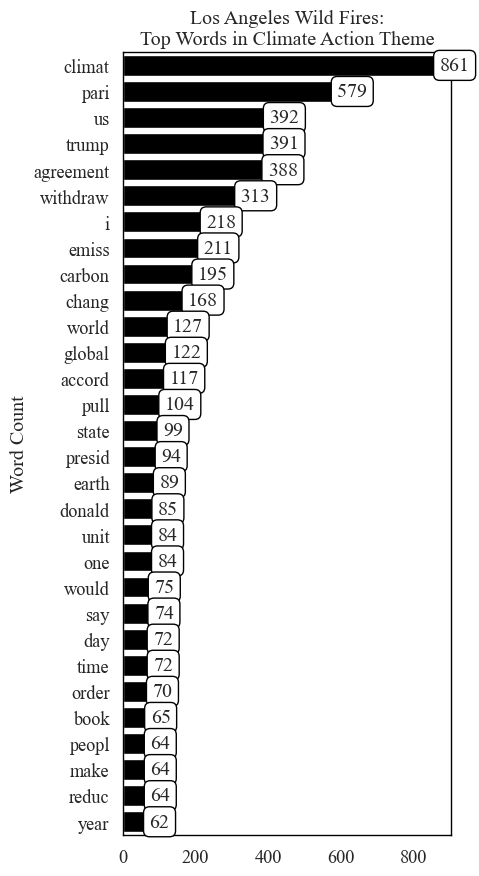

In [83]:
sb.set_style("white")
sb.set(font='Times New Roman', font_scale=1.2)
fig, ax = plt.subplots(figsize=(5,9 )) 



hist = sb.barplot(action_data,x="Count",y="Word",color="black")


'''for bar_group in hist.containers:  # `containers` contains the histogram bars grouped by hue
    # Get heights and centers for each group
    heights = [bar.get_height() for bar in bar_group]
    centers = [bar.get_x() + bar.get_width() / 2 for bar in bar_group]
    
    # Add markers
    plt.scatter(centers, heights, color='black', zorder=3)
    
    for center, height in zip(centers, heights):
        plt.text(
            center, 
            height, 
            f'{int(height):,}',  # Format with commas
            color='black', 
            ha='center', 
            va='bottom', 
            fontsize=10
        )

for container in hist.containers:
    hist.bar_label(container, fmt='%d', label_type='edge', padding=3, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
'''

for container in hist.containers:
    hist.bar_label(container, fmt='%d', label_type='edge', padding=3, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
hist.set_title("Los Angeles Wild Fires:\nTop Words in Climate Action Theme")
hist.set_xlabel("")
hist.set_ylabel("Word Count")
ax.tick_params(axis='x')
ax.grid(True)
ax.set_facecolor("white")

'''formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)'''


# Set the border (box) around the entire plot
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set the color of the border to black
    spine.set_linewidth(1)  # Set the width of the border

plt.tight_layout()
plt.savefig("WildFires - Top Words in Climate Action Theme.png",dpi=2500)
plt.show();